#**Loan Approval Prediction**

##1. Data Preprocessing

In [1]:
# Importing necessary  python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
# Loading the dataset

df = pd.read_csv('/content/sample_data/loan_approval_dataset.csv')
df.head( )

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
# Checking the dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
# Looking into the dataset columns

df.columns
# I noticed there leading white space taht should be fixed

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
# Drop irrelevant column

df.drop(['loan_id'], axis=1, inplace=True)

In [6]:
# There is a "space" before every column name. Lets remove that.

df.columns = df.columns.str.strip()

In [7]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [8]:
# Lets check for duplicate values in the dataset

df.isnull().sum()

,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0
luxury_assets_value,0


In [9]:
# Aggregate assets as  a single asset
df['Assets'] = df.residential_assets_value + df.commercial_assets_value + df.luxury_assets_value + df.bank_asset_value

# And drop the columns
df.drop(columns = ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value'],inplace=True)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,57700000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,52700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,55000000


In [10]:
# Checking the dataset data types

df.dtypes

,0
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
loan_status,object
Assets,int64


In [11]:
# Lets check distinct values in "education"

df.education.unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [12]:
# lets check distinct values in "self_employed"

df.self_employed.unique()

array([' No', ' Yes'], dtype=object)

In [13]:
# lets check distinct values in "loan_status"
df.loan_status.unique()

array([' Approved', ' Rejected'], dtype=object)

In [14]:
# Remove leading/trailing spaces

columns_to_clean = ['education', 'self_employed', 'loan_status']

for column in columns_to_clean:
       df[column] = df[column].str.strip()
       df[column] = df[column].str.replace(' +', ' ', regex=True)  # Remove multiple spaces within the text


In [15]:
#df.education.unique()

In [30]:
# lets replace "Graduate" and "Not Graduate" with numerical values
df['education'] = df['education'].replace(['Graduate', 'Not Graduate'],[1,0])

# lets replace "Yes" and "No" with numerical values
df.self_employed = df.self_employed.replace(["No","Yes"],[0,1])

#now lets replace "Approved" and "Rejected" with numerical values
df.loan_status = df.loan_status.replace(['Approved','Rejected'],[1,0])

df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Assets
0,2,1,0,9600000,29900000,12,778,1,50700000
1,0,0,1,4100000,12200000,8,417,0,17000000
2,3,1,0,9100000,29700000,20,506,0,57700000
3,3,1,0,8200000,30700000,8,467,0,52700000
4,5,0,1,9800000,24200000,20,382,0,55000000


##2. Build a Model

In [17]:
#lets have the input data
X = df.drop(columns=['loan_status'])
#X.head()

# OutPut dataset
y = df['loan_status']
#y.head()

In [18]:
#split the data into 80% for training and 20% for test
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [19]:
#checking the size of the splited data
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3415, 8), (854, 8), (3415,), (854,))

In [20]:
#we have to do the scaling of this data to improve performance of the ML model
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [21]:
#create a model
model = LogisticRegression()

In [22]:
#fit the model
model.fit(x_train, y_train)

LogisticRegression()

In [23]:
# Prediction
y_pred = model.predict(x_test)

In [24]:
#Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9168618266978923
Precision: 0.9226415094339623
Recall: 0.9421965317919075
F1 Score: 0.9323164918970448
Confusion Matrix:
[[294  41]
 [ 30 489]]


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89       335
           1       0.92      0.94      0.93       519

    accuracy                           0.92       854
   macro avg       0.92      0.91      0.91       854
weighted avg       0.92      0.92      0.92       854



In [26]:
# Get feature (input) names
feature_names = X.columns

# Get coefficients
coefficients = model.coef_[0]  # [0] to get the first row (assuming binary classification)

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Calculate importance (absolute value of coefficients)
feature_importance['Importance'] = feature_importance['Coefficient'].abs()

# Sort by importance in descending order
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print(feature_importance.head(10))

            Feature  Coefficient  Importance
6       cibil_score     4.026907    4.026907
3      income_annum    -1.373827    1.373827
4       loan_amount     1.138632    1.138632
5         loan_term    -0.855748    0.855748
7            Assets     0.280740    0.280740
1         education     0.093964    0.093964
0  no_of_dependents    -0.047602    0.047602
2     self_employed     0.019784    0.019784


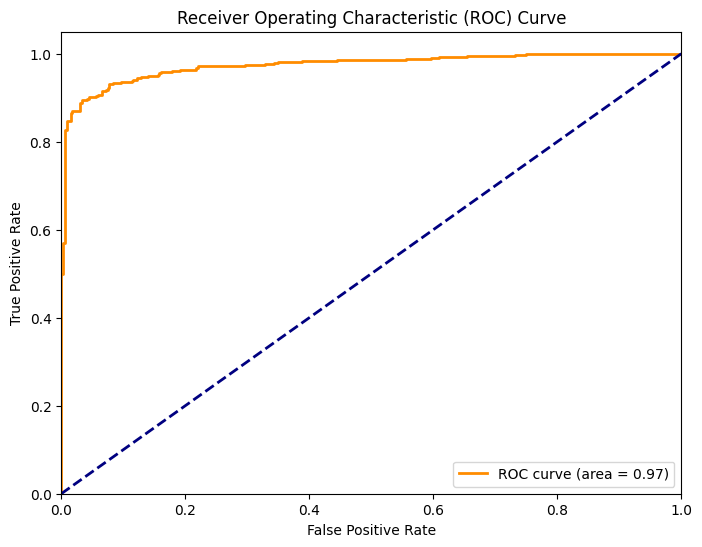

In [27]:
# Plot ORC graph
y_probs = model.predict_proba(x_test)[:, 1]  # Probabilities for class 1 (Returning Customer)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

##3. Model Deployment

In [28]:
# lets predict some values
pred_data = pd.DataFrame([['2','1','0','9600000','29900000','12','778','50700000']],columns=['no_of_dependents','education','self_employed','income_annum','loan_amount','loan_term','cibil_score','Assets'])

# lets scale this dataset with "scaler.transform"
pred_data = scaler.transform(pred_data)

# lets predict the value..
model.predict(pred_data)

array([1])

In [29]:
# Now we need "pickle" to save the model
import pickle as pk

pk.dump(model, open('model.pk1','wb'))

# we also need to convert "scaler"
# wb - binary access
pk.dump(scaler, open('scaler.pk1','wb'))


